Potting Data Analysis - New Routine
===================================

This notebook will contain analysis of the data saved in logfiles by the new module potting routine.

First, one must prepare the datafiles.
  1. Log into the t3
  2. execute the following command to create an archive of all potting data 
      ```sh
      zip -uj Potting_Logs.zip /home/dominguez/cfangmeier/elog/elog-2.9.2/logbooks/SiLab_Logbook/*_Config-*-*-*.zip
      ```
  3. Copy Potting_Logs.zip into the same directory as this notebook
  4. Run the script to convert the logfiles to JSON
     ```sh
     ./PottingLog2JSON.py Potting_Logs.zip
     ```

After running the above, the resulting json can be read in and processed.

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json
import pprint

In [8]:
dec = json.JSONDecoder()
with open('Potting_Logs.json','r') as f:
    modules = dec.decode(f.read())
pprint.pprint(modules[0])

{'BBM_center': ['250.776685', '245.225118', '62.337526'],
 'BBM_fids': {'fid_BL': {'fid_pos': ['241.688119', '278.662314', '62.339999'],
                         'img_crd': ['0.331575', '0.646166', '0.000000'],
                         'img_pos': ['241.872544', '278.541874', '62.339999'],
                         'name': 'fid_BL',
                         'source': 'Pattern Recognition'},
              'fid_BR': {'fid_pos': ['259.952430', '278.637133', '62.339999'],
                         'img_crd': ['0.293101', '0.654449', '0.000000'],
                         'img_pos': ['260.178985', '278.509867', '62.339999'],
                         'name': 'fid_BR',
                         'source': 'Pattern Recognition'},
              'fid_TL': {'fid_pos': ['241.602637', '211.811453', '62.330107'],
                         'img_crd': ['0.360445', '0.710510', '0.000000'],
                         'img_pos': ['241.755450', '211.637993', '62.330107'],
                         'name': 'fid_TL',

<IPython.core.display.Javascript object>


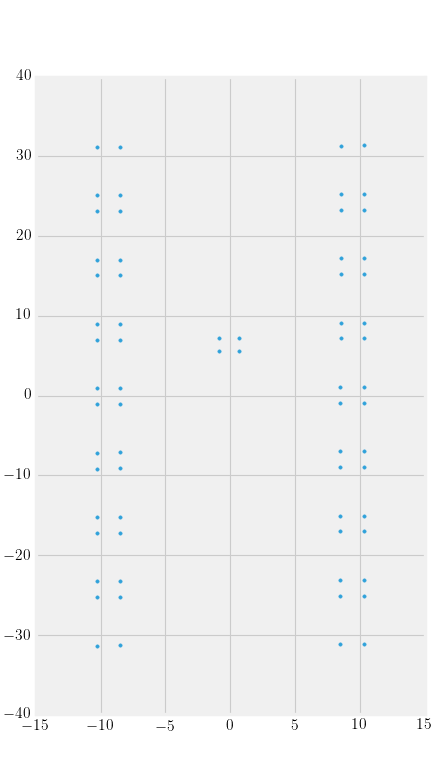

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=1)
for module in modules:
    pts_local = []
    for val in module['pot_lines'].values():
        pts_local.append(val['local']['start'])
        pts_local.append(val['local']['end'])

    xs,ys,zs = zip(*pts_local)
    axs.plot(xs,ys, '.')
plt.show()